## Import Lib

In [23]:
import pandas as pd
import tqdm.notebook as tq
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Mô tả về dữ liệu

In [58]:
df = pd.read_csv('data_problem2.csv')
df.head(5)

,Họ Và Tên,Chuyên Ngành,Niên Khóa,P1C1,P1C2,P1C3,P1C4,P1C5,P2C1,P2C2,P2C3,P2C4,P2C5
0,Đặng Thành Biên,CK,16,3,4,4,Không thể mở rộng bãi xe,Sinh viên nhiều,1,1,1,Xây thêm cơ sở,Có
1,Lê Minh Nhật,CK,19,3,2,3,Không biết,"Bãi giữ xe nhỏ, sinh viên lại đông",4,3,4,Không biết,Không
2,Nguyễn Đại Phong,CNSH,16,3,3,2,Không thể mở rộng,Bãi giữ xe nhỏ,2,4,2,Xây thêm cơ sở,Có
3,Nguyễn Thị Hằng Vi,CNSH,16,2,2,2,Không biết,Sinh viên đông,3,3,3,Mở rộng thêm bãi giữ xe,Có
4,Trần Ngọc Phát,DT,17,3,3,3,Không biết,Sinh viên nhiều,4,4,4,Không biết,Không


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Họ Và Tên     50 non-null     object
 1   Chuyên Ngành  50 non-null     object
 2   Niên Khóa     50 non-null     int64 
 3   P1C1          50 non-null     int64 
 4   P1C2          50 non-null     int64 
 5   P1C3          50 non-null     int64 
 6   P1C4          50 non-null     object
 7   P1C5          50 non-null     object
 8   P2C1          50 non-null     int64 
 9   P2C2          50 non-null     int64 
 10  P2C3          50 non-null     int64 
 11  P2C4          50 non-null     object
 12  P2C5          50 non-null     object
dtypes: int64(7), object(6)
memory usage: 5.2+ KB


- Cột Họ và tên: Tên của sinh viên làm khảo sát (Kiểu string)
- Cột Chuyên ngành: Chuyên ngành của sinh viên làm khảo sát (Các chuyên ngành của các khoa) (Kiểu string)
- Cột Niên khóa: Khóa của sinh viên làm khảo sát (K16 → K19)  (Giá trị number từ 16 → 19 đại diện cho mỗi khóa)
- Những cột còn lại mang quy tắt như sau:
> Nếu cột có dạng **PxCy**: có nghĩa đây là câu hỏi thuộc phần x câu hỏi thứ y
- Các cột từ 4 -> 6 và 9 -> 11 là các câu hỏi được đo theo thang đo thứ bậc từ 1 - > 5 *(Trong đó 1↔Hoàn toàn đồng ý, 2↔Đồng Ý, 3↔Bình Thường,4↔Không Đồng Ý, 5↔Hoàn Toàn Không Đồng Ý)*
- Các cột từ 7 -> 8 và 12 -> 13 là các câu hỏi với câu trả lời là dạng text. (kiểu string)

## Thực hiện các thống kê cơ bản

In [60]:
data1 = df[['P1C1','P1C2','P1C3','P2C1','P2C2','P2C3']]
data2 = df[['P1C4','P1C5','P2C4','P2C5']]

In [61]:
data1 = data1.rename(columns={'P1C1': 'Số lượng phương tiện giao thông tăng cao?', 'P1C2': 'Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?', 'P1C3': 'Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?',
                              'P2C1': 'Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các buổi họp, hội thảo để tìm ra giải pháp và xây dựng kế hoạch cụ thể?', 'P2C2': 'Bạn nghĩ rằng ban lãnh đạo nhà trường nên thúc đẩy sự hợp tác và liên kết với các tổ chức, cơ quan chính phủ và các đối tác xã hội để hỗ trợ trong việc giải quyết vấn đề này?', 'P2C3': 'Bạn nghĩ rằng ban lãnh đạo nhà trường cần thiết lập các cơ chế phản hồi và xử lý nhanh chóng các phản ánh, khiếu nại liên quan đến vấn đề này từ phía cộng đồng học sinh, phụ huynh và giáo viên?'})

In [62]:
data2 = data2.rename(columns={'P1C4': 'Tại sao các cơ sở hạ tầng giao thông không được nâng cấp đồng bộ để đối phó với tình trạng kẹt xe ngày càng trầm trọng?', 'P1C5': 'Tại sao vấn đề kẹt xe lại trở nên khó giải quyết hơn trong vài tháng gần đây, mặc dù đã có các nỗ lực cải thiện?',
                              'P2C4': 'Theo bạn, ban lãnh đạo nhà trường cần áp dụng những biện pháp cụ thể để tăng cường an toàn và trật tự trong trường học nhằm tạo ra một môi trường học tập tích cực?', 'P2C5': 'Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các cuộc họp định kỳ để đánh giá và điều chỉnh các kế hoạch và biện pháp khắc phục đã áp dụng?', })

In [29]:
data1.describe()

,Số lượng phương tiện giao thông tăng cao?,Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?,Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?,"Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các buổi họp, hội thảo để tìm ra giải pháp và xây dựng kế hoạch cụ thể?","Bạn nghĩ rằng ban lãnh đạo nhà trường nên thúc đẩy sự hợp tác và liên kết với các tổ chức, cơ quan chính phủ và các đối tác xã hội để hỗ trợ trong việc giải quyết vấn đề này?","Bạn nghĩ rằng ban lãnh đạo nhà trường cần thiết lập các cơ chế phản hồi và xử lý nhanh chóng các phản ánh, khiếu nại liên quan đến vấn đề này từ phía cộng đồng học sinh, phụ huynh và giáo viên?"
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.0000
mean,1.920000,2.220000,2.34000,2.420000,2.780000,2.5400
std,0.876915,1.035887,1.22241,0.810392,0.910035,1.0919
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.0000
25%,1.000000,1.000000,1.00000,2.000000,2.000000,2.0000
50%,2.000000,2.000000,2.00000,2.000000,3.000000,2.0000
75%,2.750000,3.000000,3.00000,3.000000,3.000000,3.0000
max,4.000000,5.000000,5.00000,4.000000,5.000000,5.0000


In [30]:
data2.describe()

,Tại sao các cơ sở hạ tầng giao thông không được nâng cấp đồng bộ để đối phó với tình trạng kẹt xe ngày càng trầm trọng?,"Tại sao vấn đề kẹt xe lại trở nên khó giải quyết hơn trong vài tháng gần đây, mặc dù đã có các nỗ lực cải thiện?","Theo bạn, ban lãnh đạo nhà trường cần áp dụng những biện pháp cụ thể để tăng cường an toàn và trật tự trong trường học nhằm tạo ra một môi trường học tập tích cực?","Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các cuộc họp định kỳ để đánh giá và điều chỉnh các kế hoạch và biện pháp khắc phục đã áp dụng?"
count,50,50,50,50
unique,20,35,36,7
top,Không biết,Sinh viên đông,Xây thêm cơ sở,Có
freq,14,7,7,41


## Tìm mối tương quan giữa các câu hỏi khảo sát và kết quả

##### (Dự đoán mối tương quan giữa các câu hỏi và kết quả khảo sát dựa trên median và mean)
+ 1 <= mean, median <= 2: Hoàn toàn đồng tình quan điểm
+ 2 < mean, median <= 3: Đồng ý
+ 3 < mean, median <= 4: Không đồng ý
+ 4 < mean, median <= 5: Hoàn toàn không đồng ý

In [31]:
for i in data1.columns:
    print(i)
    print(f"+ Trung bình: {data1[i].mean()}\n+ Trung vị: {data1[i].median()}\n+ Độ lệch chuẩn: {data1[i].std()}")

Số lượng phương tiện giao thông tăng cao?
+ Trung bình: 1.92
+ Trung vị: 2.0
+ Độ lệch chuẩn: 0.8769148144698746
Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?
+ Trung bình: 2.22
+ Trung vị: 2.0
+ Độ lệch chuẩn: 1.0358866851590458
Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?
+ Trung bình: 2.34
+ Trung vị: 2.0
+ Độ lệch chuẩn: 1.2224097980160806
Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các buổi họp, hội thảo để tìm ra giải pháp và xây dựng kế hoạch cụ thể?
+ Trung bình: 2.42
+ Trung vị: 2.0
+ Độ lệch chuẩn: 0.8103916916390191
Bạn nghĩ rằng ban lãnh đạo nhà trường nên thúc đẩy sự hợp tác và liên kết với các tổ chức, cơ quan chính phủ và các đối tác xã hội để hỗ trợ trong việc giải quyết vấn đề này?
+ Trung bình: 2.78
+ Trung vị: 3.0
+ Độ lệch chuẩn: 0.9100347604933138
Bạn nghĩ rằng ban lãnh đạo nhà trường cần thiết lập các cơ chế phản hồi và xử lý nhanh ch

In [32]:
# Khởi tạo một dictionary để lưu trữ tần suất xuất hiện của các yêu cầu và mong muốn
tan_suat = {}

# Lặp qua từng cột trong danh sách cột yêu cầu
for column in data1:
    # Đếm số lần xuất hiện của mỗi yêu cầu trong cột và lưu vào dictionary
    tan_suat[column] = data1[column].value_counts()

# In ra kết quả
for column, frequency in tan_suat.items():
    print(f"Tần suất xuất hiện của cột {column}:")
    print(frequency)
    print()

Tần suất xuất hiện của cột Số lượng phương tiện giao thông tăng cao?:
Số lượng phương tiện giao thông tăng cao?
1    19
2    18
3    11
4     2
Name: count, dtype: int64

Tần suất xuất hiện của cột Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?:
Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?
2    18
1    14
3    12
4     5
5     1
Name: count, dtype: int64

Tần suất xuất hiện của cột Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?:
Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?
2    16
1    15
3     9
4     7
5     3
Name: count, dtype: int64

Tần suất xuất hiện của cột Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các buổi họp, hội thảo để tìm ra giải pháp và xây dựng kế hoạch cụ thể?:
Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các b

In [33]:
phan_tram = {}

for column in data1:
    dem_phan_tram = data1[column].value_counts()
    phan_tram[column] = (dem_phan_tram / len(data1[column])) * 100

# In ra kết quả
for column, percentage in phan_tram.items():
    print(f"Tỷ lệ phần trăm các thuộc tính của cột {column}:")
    print(percentage)
    print()


Tỷ lệ phần trăm các thuộc tính của cột Số lượng phương tiện giao thông tăng cao?:
Số lượng phương tiện giao thông tăng cao?
1    38.0
2    36.0
3    22.0
4     4.0
Name: count, dtype: float64

Tỷ lệ phần trăm các thuộc tính của cột Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?:
Bạn có cho rằng các hàng quán ở trước cổng trường ảnh hưởng đến tình trạng kẹt xe không?
2    36.0
1    28.0
3    24.0
4    10.0
5     2.0
Name: count, dtype: float64

Tỷ lệ phần trăm các thuộc tính của cột Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?:
Bạn nghĩ rằng thiếu sự quản lý hiệu quả trong việc dẫn dắt xe của sinh viên vào trường có ảnh hưởng đến tình trạng kẹt xe không?
2    32.0
1    30.0
3    18.0
4    14.0
5     6.0
Name: count, dtype: float64

Tỷ lệ phần trăm các thuộc tính của cột Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các buổi họp, hội thảo để tìm ra giải pháp và

In [65]:
import pandas as pd
data1 = df.drop(['Họ Và Tên', 'Chuyên Ngành', 'Niên Khóa', 'P1C4','P1C5','P2C4','P2C5'], axis=1)

correlation_matrix = data1.corr()

print("Ma trận tương quan:")
print(correlation_matrix)


Ma trận tương quan:
          P1C1      P1C2      P1C3      P2C1      P2C2      P2C3
P1C1  1.000000  0.603898  0.482813  0.277989  0.105362  0.131294
P1C2  0.603898  1.000000  0.697206  0.228034  0.182283  0.145427
P1C3  0.482813  0.697206  1.000000  0.244330  0.343794  0.196016
P2C1  0.277989  0.228034  0.244330  1.000000  0.238538  0.568747
P2C2  0.105362  0.182283  0.343794  0.238538  1.000000  0.491685
P2C3  0.131294  0.145427  0.196016  0.568747  0.491685  1.000000


## Xác định các yếu tố quan trọng ảnh hưởng đến kết quả

In [34]:
def preprocessP1C5(x):
    if isinstance(x,int):
        return x
    x = x.lower()
    # 1: số lượng sinh viên và phương tiện
    # 2: bãi giữ xe
    # 3: lịch học và thời tiến
    sv = "sinh viên đông và số lượng phương tiện nhiều".split()
    bgx = "bãi giữ xe nhỏ".split()
    kh = "Trùng lịch học thêm thời tiết oi bức".split()
    res = 0
    for i in sv:
        if(i in  x):
            res += 1
            break
    for i in bgx:
        if(i in  x):
            res += 2
            break
    for i in kh:
        if(i in  x):
            res += 4
            break
    return res
def preprocessP2C4(x):
    if isinstance(x,int):
        return x
    x = x.lower()
    # 1: Không rõ, không biêt
    # 2: Mở rộng bãi giữ xe
    # 3: Chia giờ học
    xt = "xây thêm cơ sở mới để giảm tải".split()
    mr = "mở rộng bãi giữ xe hoặc thuê thêm xung quanh".split()
    ch = "Chia giờ học hợp lý".split()
    res = 0
    for i in xt:
        if(i in  x):
            res += 1
            break
    for i in mr:
        if(i in  x):
            res += 2
            break
    for i in ch:
        if(i in  x):
            res += 4
            break
    return res
def preprocessP1C4(x):
    if isinstance(x,int):
        return x
    x = x.lower()
    # 1: không rõ, không biết
    # 2: không thể mở rộng, không thể quy hoạch
    # 3: bãi giữ xe không thể mở rộng
    kr = "không rõ, không biết".split()
    ktmr = "không thể mở rộng, không thể quy hoạch".split()
    bgx = "bãi giữ xe không thể mở rộng".split()
    res = 0
    for i in kr:
        if(i in  x):
            res += 1
            break
    for i in ktmr:
        if(i in  x):
            res += 2
            break
    for i in bgx:
        if(i in  x):
            res += 4
            break
    return res
def preprocessP2C5(x):
    if isinstance(x,int):
        return x
    x = x.lower()
    # 1: có nên thường xuyên liên tục
    # 2: không
    ys = "có nên thường xuyên liên tục".split()
    no = "không".split()
    res = 0
    for i in ys:
        if(i in  x):
            res += 2
            break
    for i in no:
        if(i in  x):
            res += 3
            break
    return res

In [35]:
data2['Tại sao các cơ sở hạ tầng giao thông không được nâng cấp đồng bộ để đối phó với tình trạng kẹt xe ngày càng trầm trọng?'].apply(preprocessP1C4)
data2['Tại sao vấn đề kẹt xe lại trở nên khó giải quyết hơn trong vài tháng gần đây, mặc dù đã có các nỗ lực cải thiện?'].apply(preprocessP1C5)
data2['Theo bạn, ban lãnh đạo nhà trường cần áp dụng những biện pháp cụ thể để tăng cường an toàn và trật tự trong trường học nhằm tạo ra một môi trường học tập tích cực?'].apply(preprocessP2C4)
data2['Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các cuộc họp định kỳ để đánh giá và điều chỉnh các kế hoạch và biện pháp khắc phục đã áp dụng?'].apply(preprocessP2C5)
print()

## Trực quan hóa dữ liệu và kết quả

In [36]:
year = df['Niên Khóa'].value_counts().index

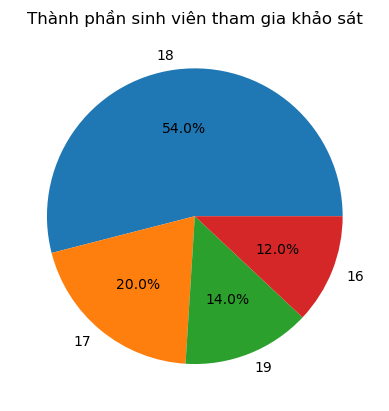

Niên Khóa
18    27
17    10
19     7
16     6
Name: count, dtype: int64


In [37]:
plt.pie(df['Niên Khóa'].value_counts(), labels = year,  autopct='%1.1f%%')
plt.title('Thành phần sinh viên tham gia khảo sát')
plt.show()
print(df['Niên Khóa'].value_counts())

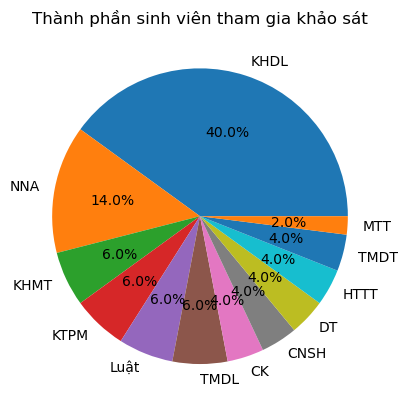

Chuyên Ngành
KHDL    20
NNA      7
KHMT     3
KTPM     3
Luật     3
TMDL     3
CK       2
CNSH     2
DT       2
HTTT     2
TMDT     2
MTT      1
Name: count, dtype: int64


In [40]:
year = df['Chuyên Ngành'].value_counts().index
plt.pie(df['Chuyên Ngành'].value_counts(), labels = year,  autopct='%1.1f%%')
plt.title('Thành phần sinh viên tham gia khảo sát')
plt.show()
print(df['Chuyên Ngành'].value_counts())

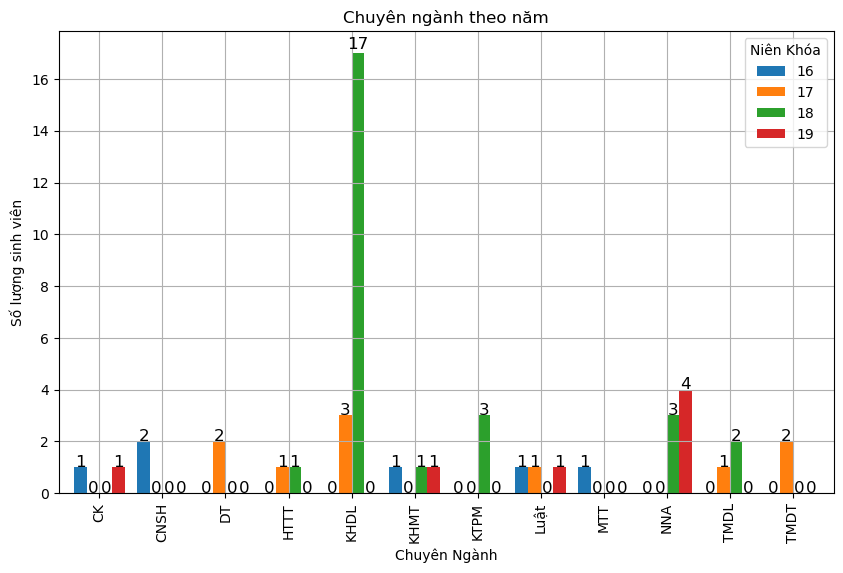

In [42]:
# nhóm dữ liệu và tính số lượng sinh viên cho từng nhóm
counts = df.groupby(['Chuyên Ngành', 'Niên Khóa']).size().unstack(fill_value=0)

# tạo biểu đồ cột
ax = counts.plot(kind='bar', figsize=(10, 6), width=0.8)

# tùy chỉnh chiều rộng của các cột
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() * 1.01), ha='center', fontsize=12)

# thiết lập tiêu đề và chú thích
plt.title('Chuyên ngành theo năm')
plt.xlabel('Chuyên Ngành')
plt.ylabel('Số lượng sinh viên')
plt.legend(title='Niên Khóa')
plt.grid()

plt.show()

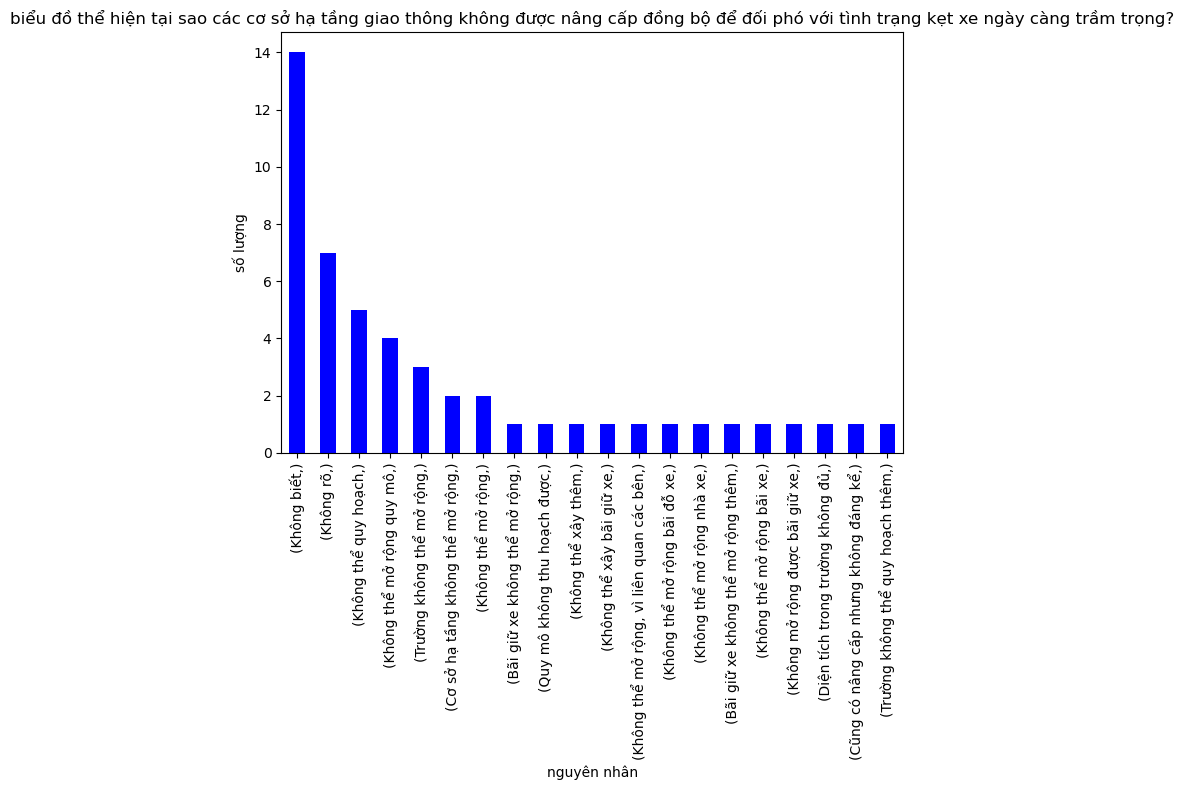

In [70]:
# Tại sao các cơ sở hạ tầng giao thông không được nâng cấp đồng bộ để đối phó với tình trạng kẹt xe ngày càng trầm trọng?
plt.figure(figsize=(7, 8))
P1C4_value_count = data2[data2.columns[0:1]].value_counts()
P1C4_value_count.plot(kind='bar',color = 'b')
plt.xlabel('nguyên nhân')
plt.ylabel('số lượng')
plt.title('biểu đồ thể hiện tại sao các cơ sở hạ tầng giao thông không được nâng cấp đồng bộ để đối phó với tình trạng kẹt xe ngày càng trầm trọng?')
plt.tight_layout()
plt.show()

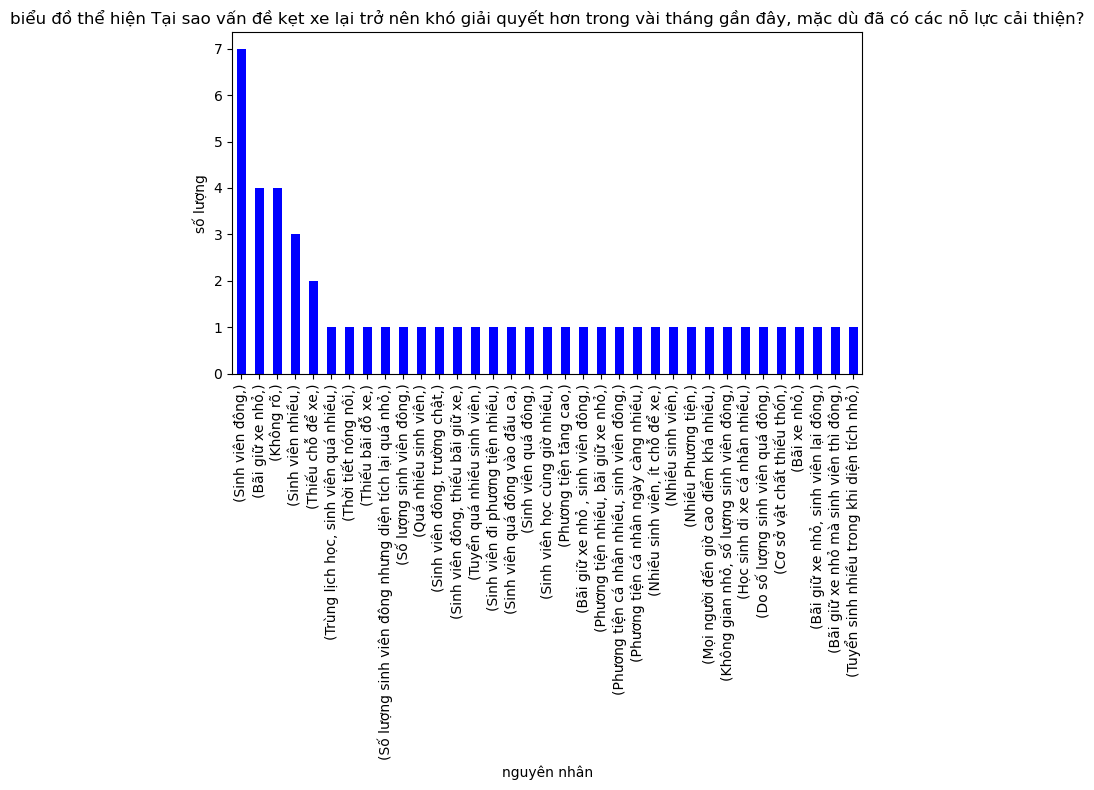

In [69]:
# Tại sao vấn đề kẹt xe lại trở nên khó giải quyết hơn trong vài tháng gần đây, mặc dù đã có các nỗ lực cải thiện?
plt.figure(figsize=(7, 8))
P1C5_value_count = data2[data2.columns[1:2]].value_counts()
P1C5_value_count.plot(kind='bar',color = 'b')
plt.xlabel('nguyên nhân')
plt.ylabel('số lượng')
plt.title('biểu đồ thể hiện Tại sao vấn đề kẹt xe lại trở nên khó giải quyết hơn trong vài tháng gần đây, mặc dù đã có các nỗ lực cải thiện?')
plt.tight_layout()
plt.show()

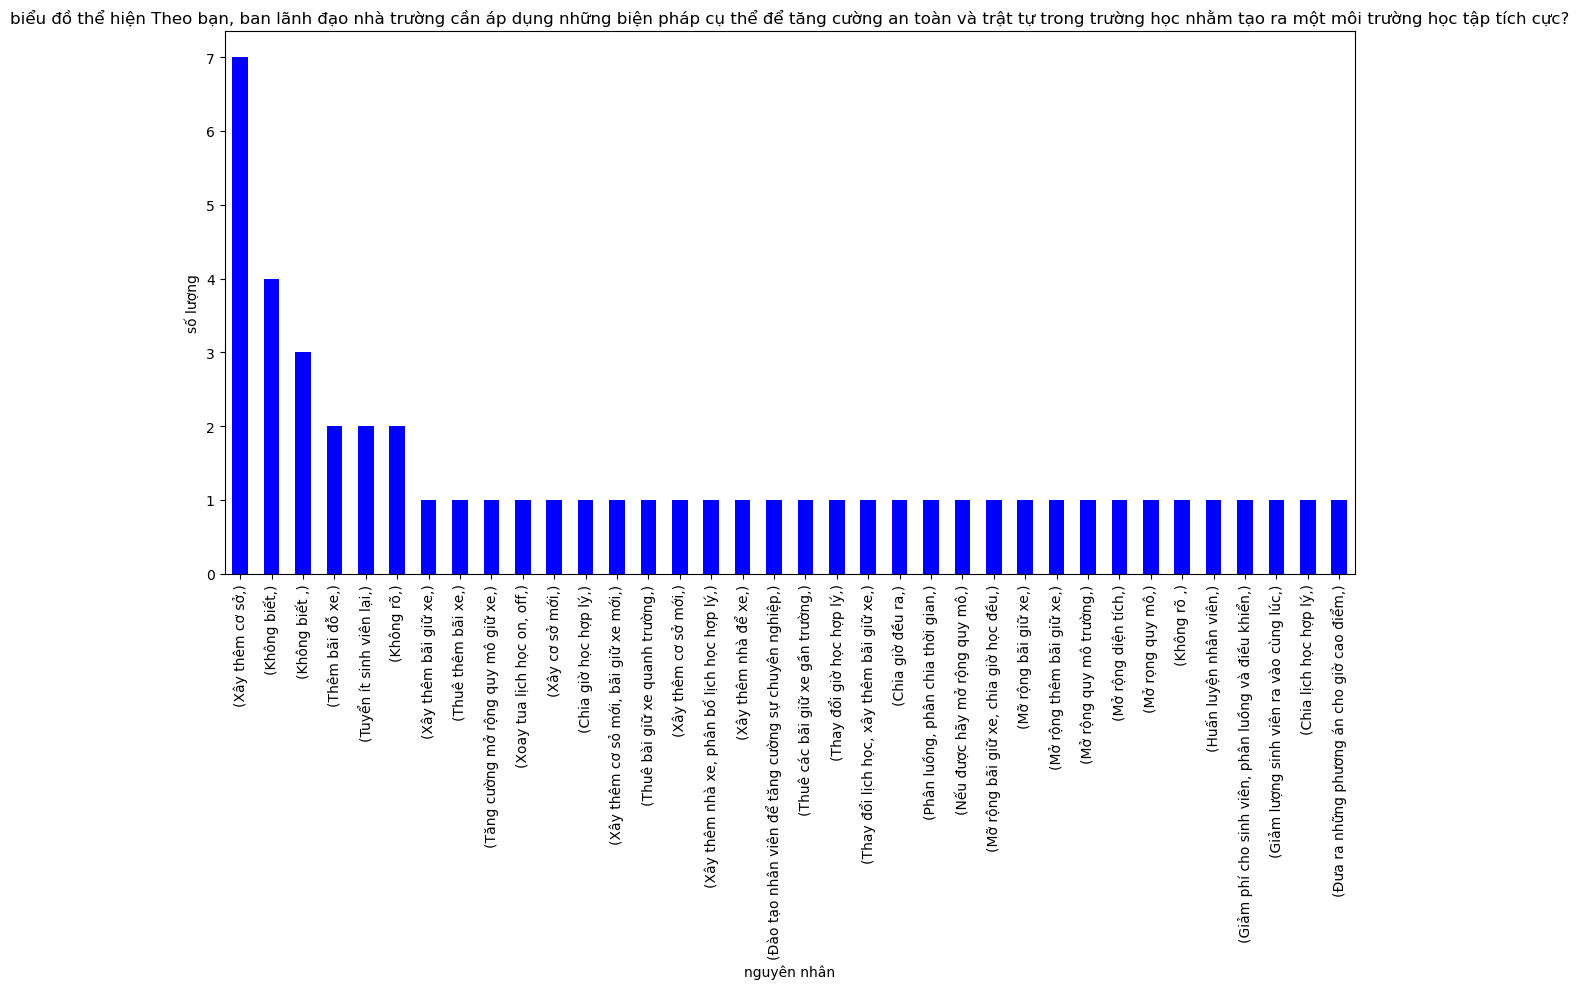

In [73]:
# Theo bạn, ban lãnh đạo nhà trường cần áp dụng những biện pháp cụ thể để tăng cường an toàn và trật tự trong trường học nhằm tạo ra một môi trường học tập tích cực?
plt.figure(figsize=(12, 10))
P1C5_value_count = data2[data2.columns[2:3]].value_counts()
P1C5_value_count.plot(kind='bar',color = 'b')
plt.xlabel('nguyên nhân')
plt.ylabel('số lượng')
plt.title('biểu đồ thể hiện Theo bạn, ban lãnh đạo nhà trường cần áp dụng những biện pháp cụ thể để tăng cường an toàn và trật tự trong trường học nhằm tạo ra một môi trường học tập tích cực?')
plt.tight_layout()
plt.show()

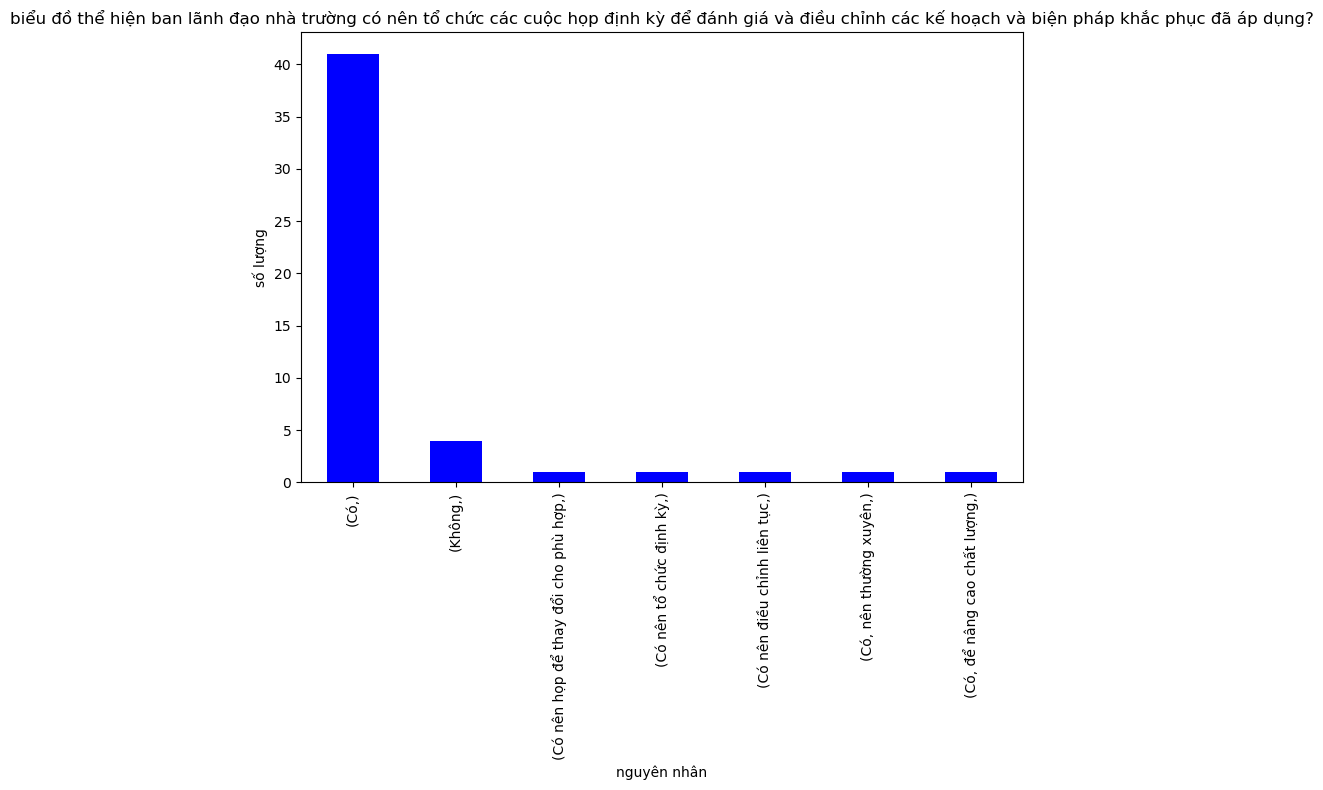

In [74]:
# Theo bạn, ban lãnh đạo nhà trường có nên tổ chức các cuộc họp định kỳ để đánh giá và điều chỉnh các kế hoạch và biện pháp khắc phục đã áp dụng?
plt.figure(figsize=(8, 8))
P1C5_value_count = data2[data2.columns[3:4]].value_counts()
P1C5_value_count.plot(kind='bar',color = 'b')
plt.xlabel('nguyên nhân')
plt.ylabel('số lượng')
plt.title('biểu đồ thể hiện ban lãnh đạo nhà trường có nên tổ chức các cuộc họp định kỳ để đánh giá và điều chỉnh các kế hoạch và biện pháp khắc phục đã áp dụng?')
plt.tight_layout()
plt.show()

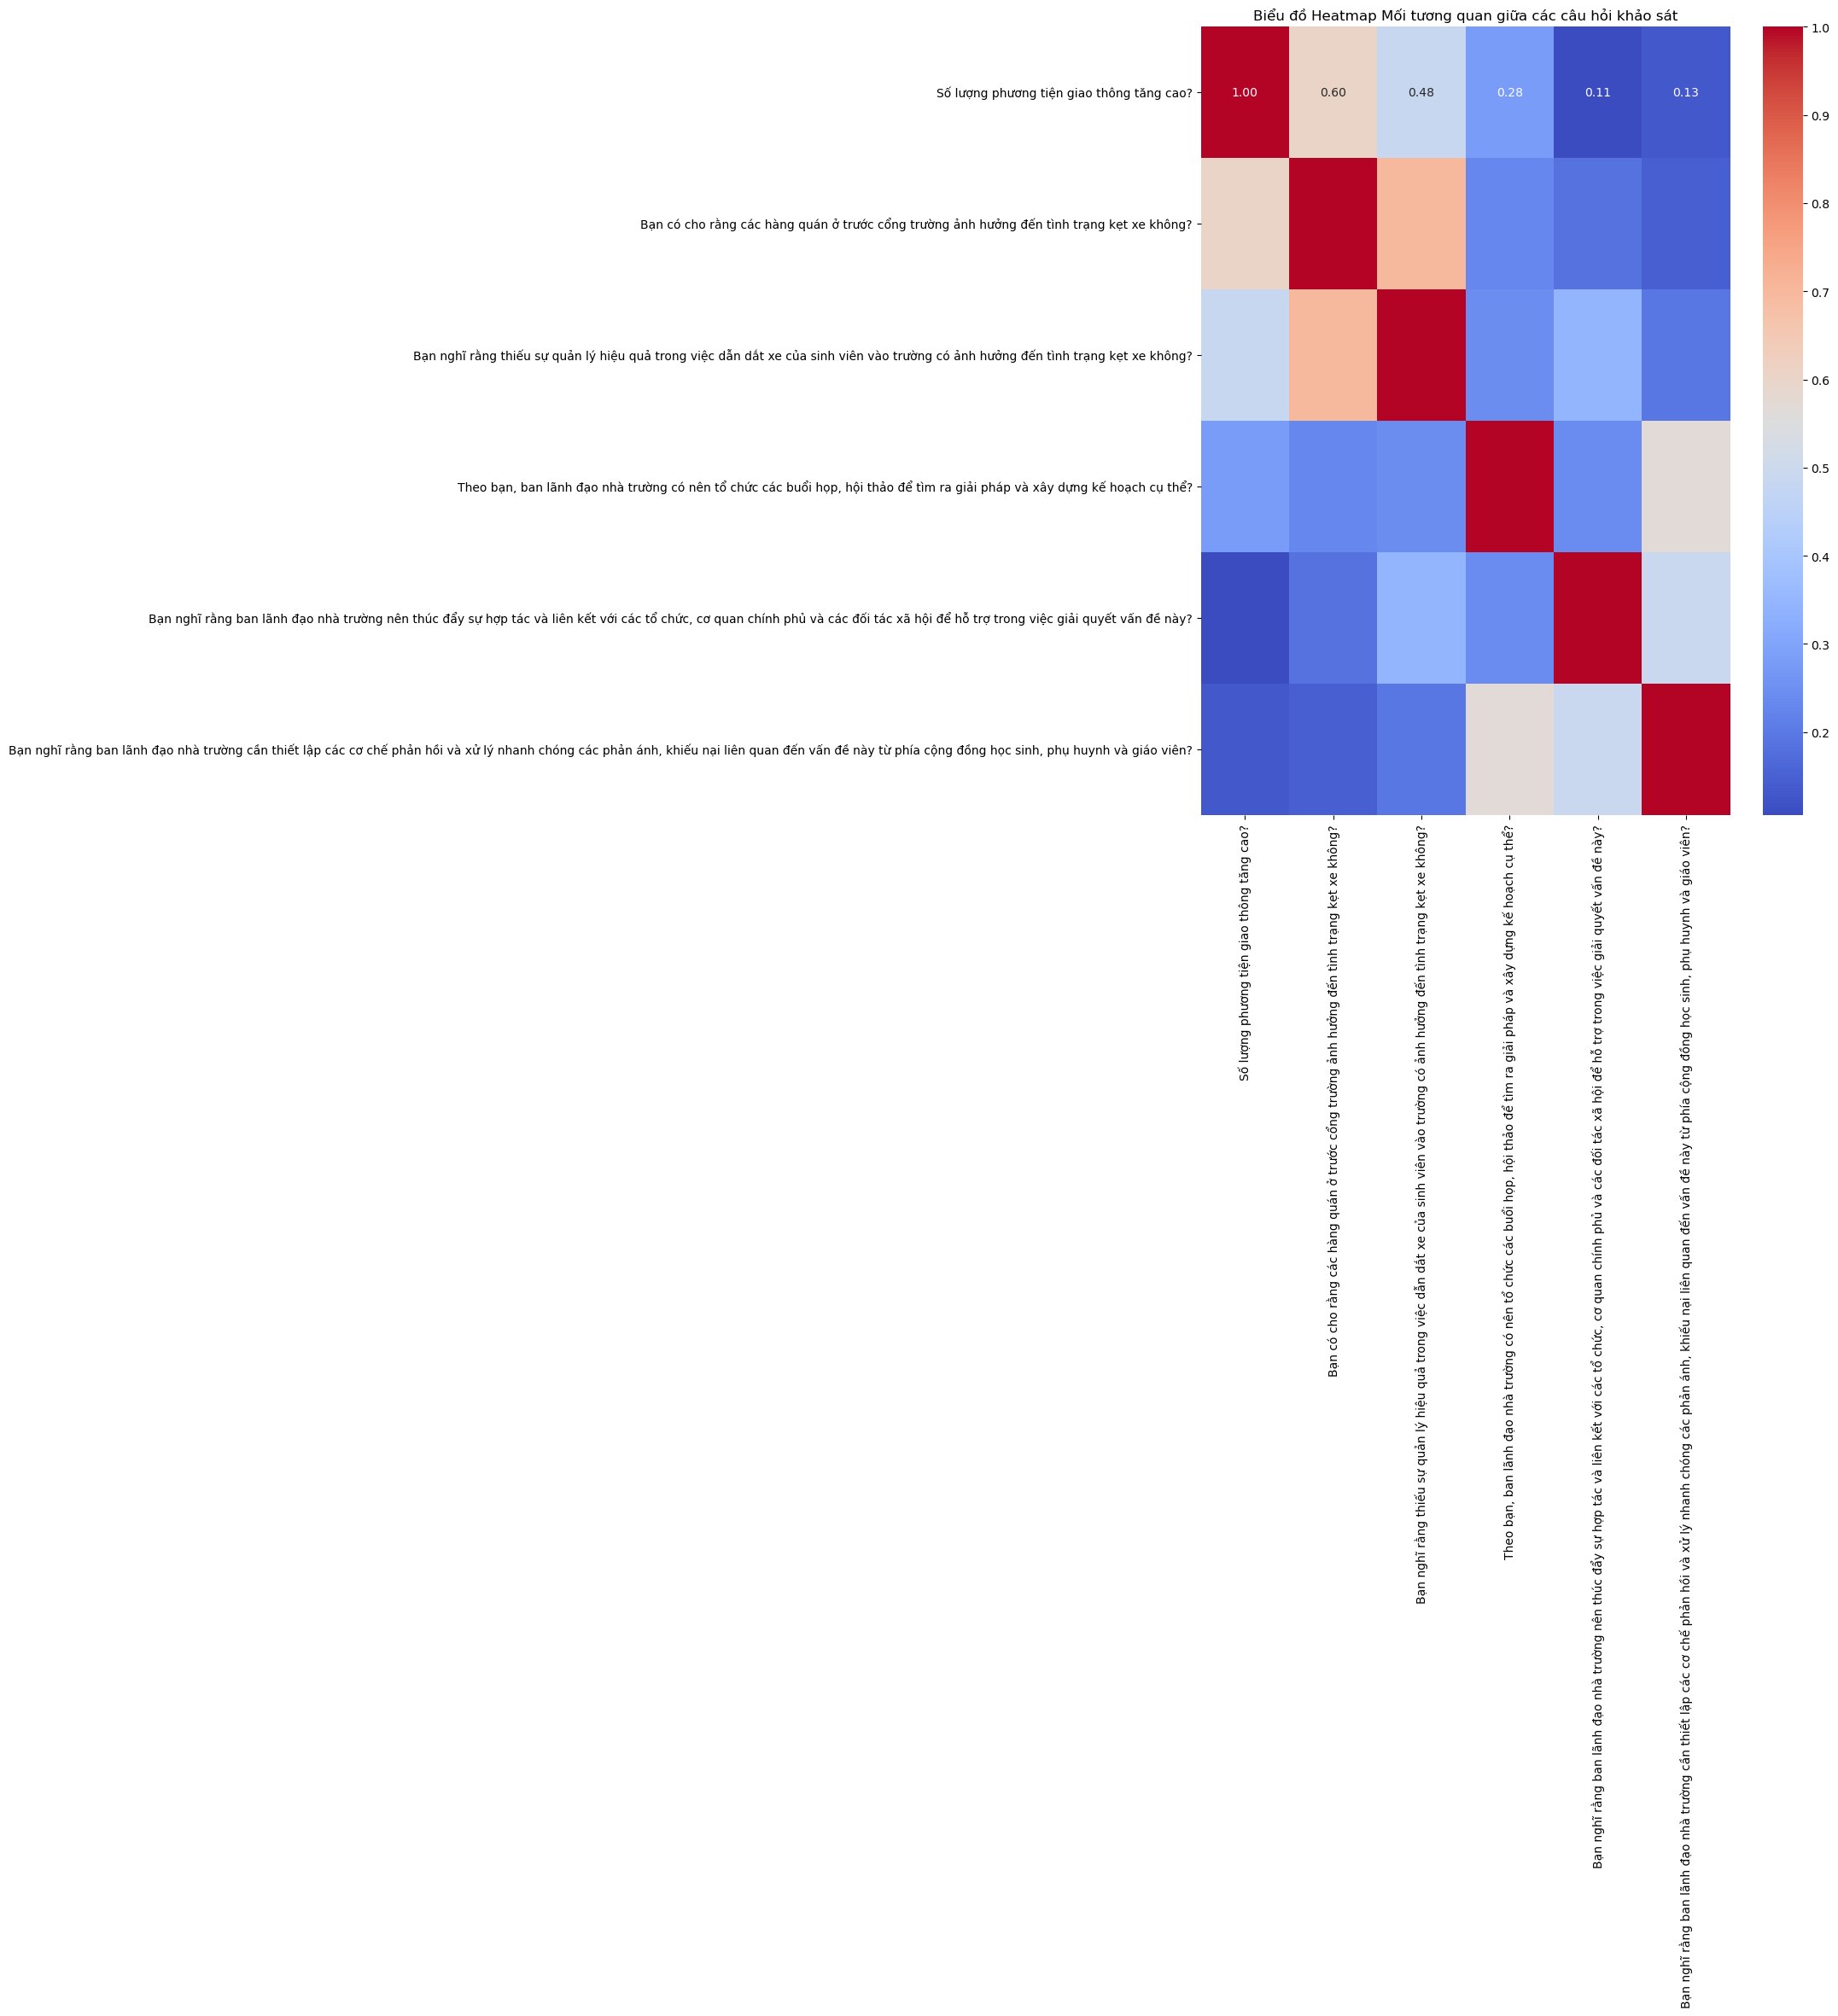

In [52]:
# Tính toán ma trận tương quan Pearson
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Biểu đồ Heatmap Mối tương quan giữa các câu hỏi khảo sát')
plt.show()
